In [14]:
import tensorflow as tf

In [15]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [16]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [17]:
train_images = np.expand_dims(train_images,-1)

In [18]:
train_images.shape

(60000, 28, 28, 1)

In [19]:
test_images = np.expand_dims(test_images,-1)#扩张维度

In [20]:
test_images.shape

(10000, 28, 28, 1)

In [21]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),input_shape=train_images.shape[1:],activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [22]:
# model = tf.keras.Sequential()#顺序模型
# model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape=train_images.shape[1:],activation='relu',padding='same'))
# model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
# mode1.add(tf.keras.layers.MaxPool2D())
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
# model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
# model.add(tf.keras.layers.MaxPool2D())
# mode1.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
# model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
# model.add(tf.keras.layers.MaxPool2D())
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same'))
# model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.GlobalAveragePooling2D())
# model.add(tf.keras.layers.Dense(256,activation='relu'))
# model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 19,466
Trainable params: 19,466
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [25]:
history = model.fit(train_images,train_labels,epochs=30,validation_data=(test_images,test_labels))

Epoch 1/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7789 - acc: 0.7423 - val_loss: 0.5253 - val_acc: 0.8222
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4878 - acc: 0.8290 - val_loss: 0.4595 - val_acc: 0.8439
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4281 - acc: 0.8503 - val_loss: 0.4555 - val_acc: 0.8336
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3946 - acc: 0.8610 - val_loss: 0.4718 - val_acc: 0.8276
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3668 - acc: 0.8706 - val_loss: 0.3776 - val_acc: 0.8700
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3467 - acc: 0.8752 - val_loss: 0.4147 - val_acc: 0.8556
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3337 - acc: 0.8819 - val_loss: 0.3556 - val_acc: 0.8736
Epoch 8/30
1875/1875 [==============================] - 9s 5m

In [26]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

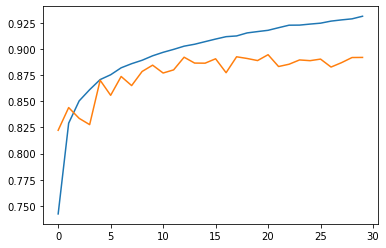

In [27]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')

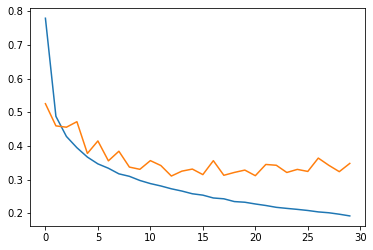

In [28]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')